Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
df=pd.read_csv("C:/Users/kasaa/Downloads/datasets/googleplaystore.csv")

In [29]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling Missing Values

In [5]:
df.dropna(subset=["Type","Content Rating","Android Ver"], inplace=True)


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [7]:
df.dropna(subset=["Current Ver"], inplace=True)


In [8]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10829, dtype: float64

In [9]:
df_paid=df[df['Type']=="Paid"]
df_free=df[df['Type']=="Free"]

In [10]:
df.groupby(by='Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192383
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.109292

In [11]:
#df['Rating'] = df['Rating'].fillna(df.groupby(by='Category')['Rating'].mean())

df['Rating'] = df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean'))



In [12]:
 df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Handling categorical variables

In [14]:
df['Category'].unique().size

33

In [15]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [16]:

df['Genres'].unique().size

119

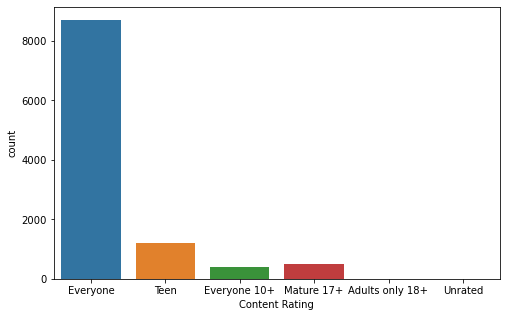

In [17]:
plt.figure(figsize=(8,5))

sns.countplot(df['Content Rating'])

In [31]:
df[df['Rating']==df['Rating'].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
625,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up
6490,MbH BM,MEDICAL,1.0,1,2.3M,100+,Free,0,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up
7144,CB Mobile Biz,FINANCE,1.0,3,8.4M,500+,Free,0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6M,100+,Free,0,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13M,100+,Free,0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up


In [21]:
df[df['Content Rating']=="Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,4.192383,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.100000,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


As there are only 5 entries out of 10,829 entries having content rating as Adults only 18+ and Unrated
let us drop those rows 

In [22]:
df.drop(df[df['Content Rating']=="Adults only 18+"].index, inplace=True)

In [23]:
df.drop(df[df['Content Rating']=="Unrated"].index, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10824 non-null  object 
 1   Category        10824 non-null  object 
 2   Rating          10824 non-null  float64
 3   Reviews         10824 non-null  object 
 4   Size            10824 non-null  object 
 5   Installs        10824 non-null  object 
 6   Type            10824 non-null  object 
 7   Price           10824 non-null  object 
 8   Content Rating  10824 non-null  object 
 9   Genres          10824 non-null  object 
 10  Last Updated    10824 non-null  object 
 11  Current Ver     10824 non-null  object 
 12  Android Ver     10824 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [25]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+'], dtype=object)

In [26]:
df_2 = pd.get_dummies(df, columns=['Content Rating', 'Type'], drop_first=True)


In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App                          10824 non-null  object 
 1   Category                     10824 non-null  object 
 2   Rating                       10824 non-null  float64
 3   Reviews                      10824 non-null  object 
 4   Size                         10824 non-null  object 
 5   Installs                     10824 non-null  object 
 6   Price                        10824 non-null  object 
 7   Genres                       10824 non-null  object 
 8   Last Updated                 10824 non-null  object 
 9   Current Ver                  10824 non-null  object 
 10  Android Ver                  10824 non-null  object 
 11  Content Rating_Everyone 10+  10824 non-null  uint8  
 12  Content Rating_Mature 17+    10824 non-null  uint8  
 13  Content Rating_T

In [25]:
df_2.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,0,0,0


In [26]:
df_2.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   App                          10824 non-null  bool 
 1   Category                     10824 non-null  bool 
 2   Rating                       10824 non-null  bool 
 3   Reviews                      10824 non-null  bool 
 4   Size                         10824 non-null  bool 
 5   Installs                     10824 non-null  bool 
 6   Price                        10824 non-null  bool 
 7   Genres                       10824 non-null  bool 
 8   Last Updated                 10824 non-null  bool 
 9   Current Ver                  10824 non-null  bool 
 10  Android Ver                  10824 non-null  bool 
 11  Content Rating_Everyone 10+  10824 non-null  bool 
 12  Content Rating_Mature 17+    10824 non-null  bool 
 13  Content Rating_Teen          10824 non-null  b

converting installs string to int

In [27]:
df_2['Installs'].max()

'500,000,000+'

In [28]:
df_2['Installs']=df_2['Installs'].str.replace(',','').str.replace('+','').astype('int')


In [29]:
df_2.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,0,0,0


App having maximum installs

In [30]:
df_2[df_2['Installs']==df_2['Installs'].max()]

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,0,Books & Reference,"August 3, 2018",Varies with device,Varies with device,0,0,1,0
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,0,Communication,"August 1, 2018",Varies with device,Varies with device,0,0,0,0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,0,Communication,"August 3, 2018",Varies with device,Varies with device,0,0,0,0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,0,Communication,"August 1, 2018",Varies with device,Varies with device,0,0,0,0
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,0,Communication,"August 2, 2018",Varies with device,Varies with device,0,0,0,0
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,0,Communication,"July 21, 2018",Varies with device,Varies with device,0,0,0,0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,0,Communication,"August 3, 2018",Varies with device,Varies with device,0,0,0,0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,0,Communication,"August 1, 2018",Varies with device,Varies with device,0,0,0,0
386,Hangouts,COMMUNICATION,4.0,3419433,Varies with device,1000000000,0,Communication,"July 21, 2018",Varies with device,Varies with device,0,0,0,0
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,0,Communication,"August 3, 2018",Varies with device,Varies with device,0,0,0,0


In [31]:
from datetime import date
today = date.today()
d = today.strftime("%B %d, %Y")
d

'October 16, 2020'

In [32]:
df_2["Last Updated"] = pd.to_datetime(df_2['Last Updated'])
df_2['year'] = df_2['Last Updated'].dt.year
df_2['month'] = df_2['Last Updated'].dt.month
df_2['day'] = df_2['Last Updated'].dt.day


In [33]:
df_2.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid,year,month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,0,0,0,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,0,0,0,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0,0,0,0,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0,Art & Design,2018-06-08,Varies with device,4.2 and up,0,0,1,0,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0,0,0,0,2018,6,20


In [34]:
df_2['year'].unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010], dtype=int64)

In [35]:
df_year_installs=pd.DataFrame(df_2.groupby(by='year')['Installs'].max().reset_index())


In [36]:
df_year_installs

,year,Installs
0,2010,100000
1,2011,5000000
2,2012,10000000
3,2013,50000000
4,2014,50000000
5,2015,100000000
6,2016,100000000
7,2017,100000000
8,2018,1000000000


In [37]:

s1 = pd.merge(df_2, df_year_installs, how='inner', on=['year','Installs'])


In [38]:
s1.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid,year,month,day
0,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,0,Books & Reference,2018-08-03,Varies with device,Varies with device,0,0,1,0,2018,8,3
1,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,0,Communication,2018-08-01,Varies with device,Varies with device,0,0,0,0,2018,8,1
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,0,Communication,2018-08-03,Varies with device,Varies with device,0,0,0,0,2018,8,3
3,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,0,Communication,2018-08-01,Varies with device,Varies with device,0,0,0,0,2018,8,1
4,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,0,Communication,2018-08-02,Varies with device,Varies with device,0,0,0,0,2018,8,2


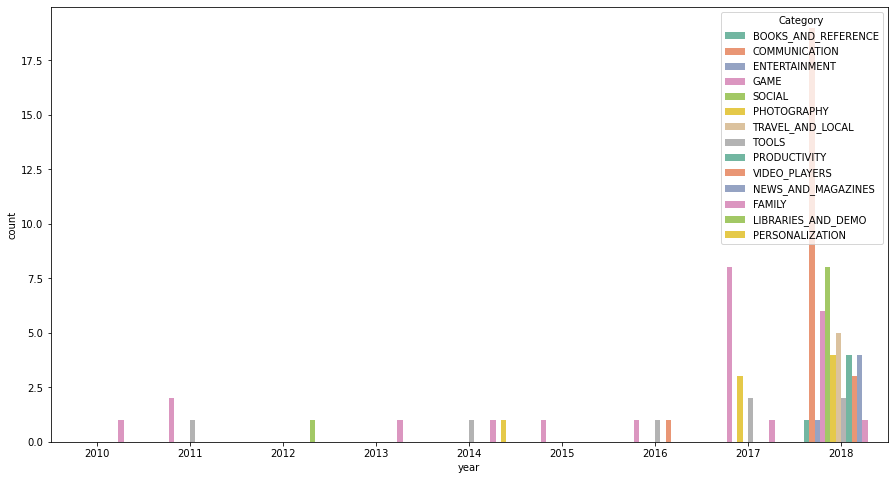

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(data=s1,x='year',hue='Category', palette="Set2")


so in the 
year 2016 Family,  
year 2017 Family, 
year 2018 communication and Games
category apps were installed in a huge number 

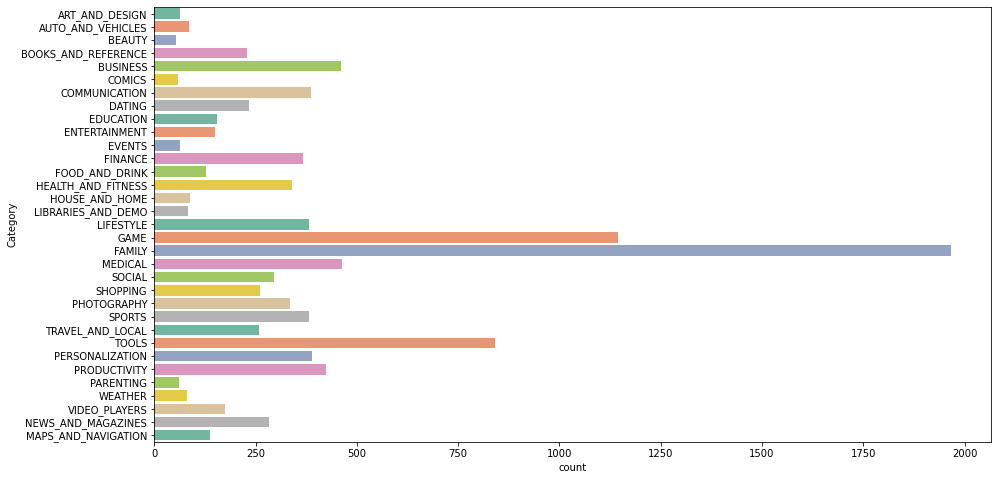

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_2,y='Category', palette="Set2")

Overall family is the most popular category

In [41]:
df_corr=df_2.corr()

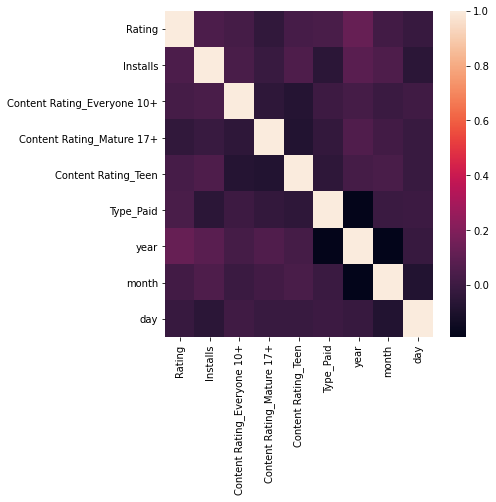

In [42]:
plt.figure(figsize=(6,6))
sns.heatmap(df_corr)

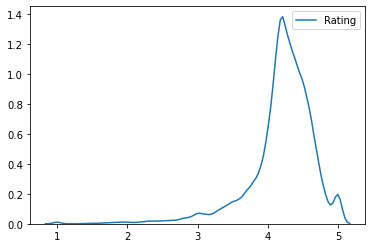

In [43]:
sns.kdeplot(df['Rating'])

In [44]:
df_rating=df_2[df_2['Rating']==df_2['Rating'].max()]

In [45]:
df_rating

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid,year,month,day
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000,0,Comics,2018-06-26,2.0,4.0.3 and up,0,0,0,0,2018,6,26
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000,0,Dating,2018-07-17,3.0,4.0.3 and up,0,1,0,0,2018,7,17
615,Awake Dating,DATING,5.0,2,70M,100,0,Dating,2018-07-24,2.2.9,4.4 and up,0,1,0,0,2018,7,24
633,Spine- The dating app,DATING,5.0,5,9.3M,500,0,Dating,2018-07-14,4.0,4.0.3 and up,0,0,1,0,2018,7,14
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100,0,Dating,2018-08-01,8.2,4.0.3 and up,0,1,0,0,2018,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100,0,Arcade,2017-06-19,2.5a,4.1 and up,0,0,0,0,2017,6,19
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,1000,0,Lifestyle,2017-12-31,0.7.1,4.4 and up,0,0,0,0,2017,12,31
10776,Monster Ride Pro,GAME,5.0,1,24M,10,0,Racing,2018-03-05,2.0,2.3 and up,0,0,0,0,2018,3,5
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,1000,0,Education,2018-06-27,3.8.0,4.1 and up,0,0,1,0,2018,6,27


In [46]:
df_rating['Installs'].max()

10000

In [47]:
df_installs=df_rating[df_rating['Installs']==df_rating['Installs'].max()]

In [48]:
df_category=df_installs[df_installs['Category']=='FAMILY']

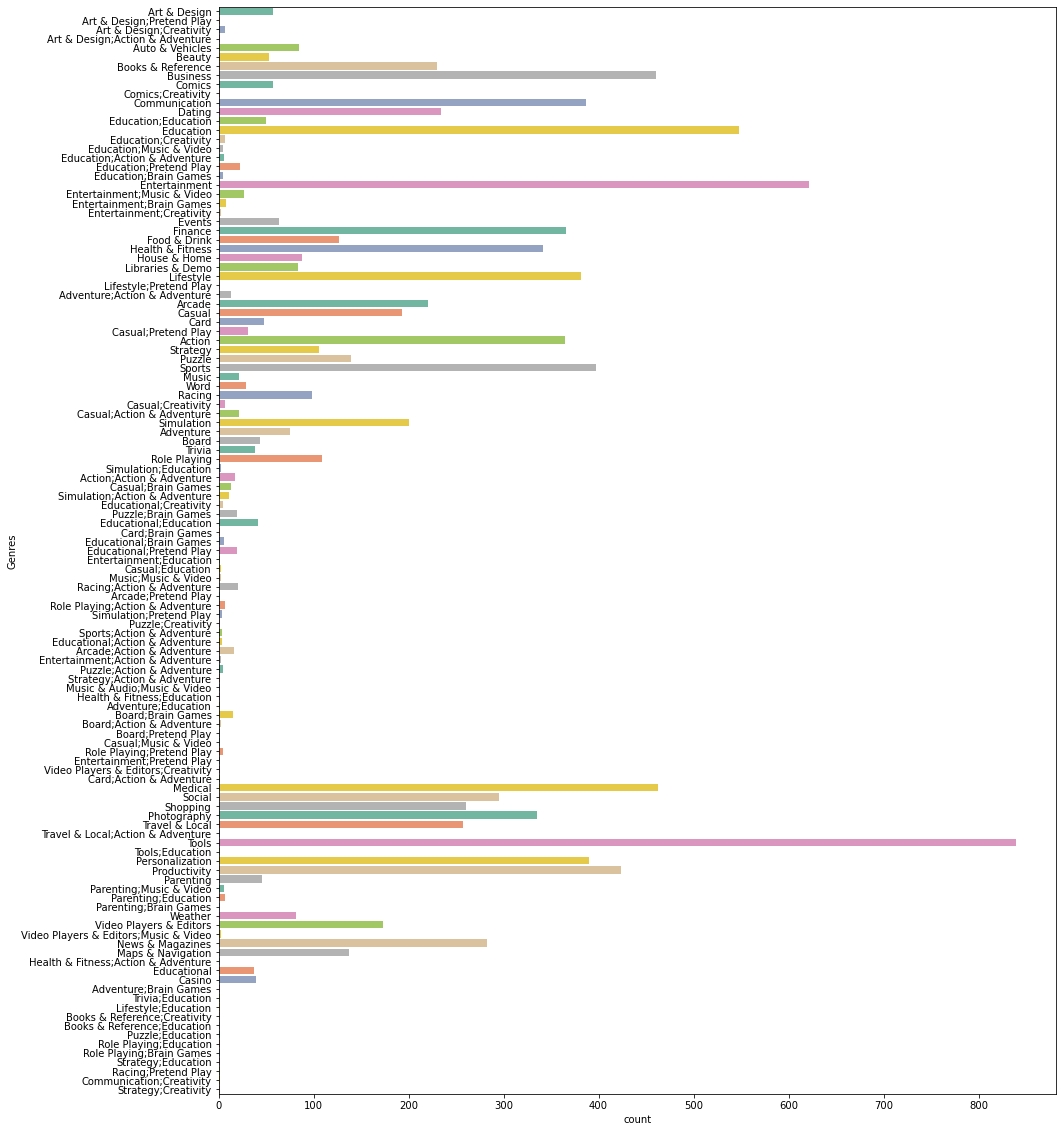

In [49]:
plt.figure(figsize=(15,20))
sns.countplot(data=df_2,y='Genres', palette="Set2")

In [50]:
df_genre=df_installs[df_installs['Genres']=='Tools']

In [51]:
df_genre

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid,year,month,day


Data visualizations

In [52]:
df_2['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10824, dtype: object

In [53]:
df_2['Size']=df_2['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')


In [54]:
df_2['Price']=df_2['Price'].str.replace('$','').astype('float')

In [55]:
df_2.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid,year,month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,0,0,0,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,0,0,0,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0.0,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0,0,0,0,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0.0,Art & Design,2018-06-08,Varies with device,4.2 and up,0,0,1,0,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0.0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0,0,0,0,2018,6,20


In [56]:
df_2.describe()

,Rating,Size,Installs,Price,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid,year,month,day
count,10824.000000,1.082400e+04,1.082400e+04,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000
mean,4.190501,1.816953e+07,1.548686e+07,1.028566,0.038156,0.046101,0.111604,0.073633,2017.400776,6.423873,15.609294
std,0.480274,2.217908e+07,8.509017e+07,15.961448,0.191581,0.209714,0.314893,0.261184,1.099143,2.578156,9.560801
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,1.000000
25%,4.047203,2.600000e+06,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,5.000000,6.000000
50%,4.259664,9.200000e+06,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,7.000000,16.000000
75%,4.500000,2.600000e+07,5.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,8.000000,24.000000
max,5.000000,1.000000e+08,1.000000e+09,400.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,12.000000,31.000000


Data Modelling

In [57]:
df_2['Reviews']=df_2['Reviews'].astype('int')


In [58]:
df_2['Last Updated']=pd.to_datetime(df_2['Last Updated'])
df_2['before update']=df_2['Last Updated'].max()-df_2['Last Updated']

App hasn't been updated

In [59]:

df_2[df_2['before update']==df_2['before update'].max()]

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Type_Paid,year,month,day,before update
7479,FML F*ck my life + widget,FAMILY,4.2,1415,209000.0,100000,0.0,Entertainment,2010-05-21,3.1,1.5 and up,0,0,0,0,2010,5,21,3001 days


In [60]:

df_2 =df_2[~df_2.isin([np.nan, np.inf, -np.inf]).any(1)]



In [61]:
data_model_x=df_2[['Category','Reviews','Size','Installs','Price','Genres','Content Rating_Everyone 10+','Content Rating_Mature 17+','Content Rating_Teen','Type_Paid','before update']]

data_model_y=df_2[['Rating']]
                   

In [62]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(data_model_x[['before update']])
data_model_x[['before update']]=scalar.transform(data_model_x[['before update']])

<ipython-input-62-728bb9c4629f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model_x[['before update']]=scalar.transform(data_model_x[['before update']])
C:\Users\kasaa\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
#from sklearn.preprocessing import MinMaxScaler
#scalar=MinMaxScaler()
#scalar.fit(data_model_x[['Size']])
#data_model_x[['Size']]=scalar.transform(data_model_x[['Size']])

In [64]:
##from sklearn.preprocessing import MinMaxScaler
#scalar=MinMaxScaler()
#scalar.fit(data_model_x[['Price']])
#data_model_x[['Price']]=scalar.transform(data_model_x[['Price']])

In [65]:
data_model_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Category                     10824 non-null  object 
 1   Reviews                      10824 non-null  int32  
 2   Size                         10824 non-null  float64
 3   Installs                     10824 non-null  int32  
 4   Price                        10824 non-null  float64
 5   Genres                       10824 non-null  object 
 6   Content Rating_Everyone 10+  10824 non-null  uint8  
 7   Content Rating_Mature 17+    10824 non-null  uint8  
 8   Content Rating_Teen          10824 non-null  uint8  
 9   Type_Paid                    10824 non-null  uint8  
 10  before update                10824 non-null  float64
dtypes: float64(3), int32(2), object(2), uint8(4)
memory usage: 634.2+ KB


In [66]:
encoded_x=pd.get_dummies(data_model_x, columns=['Category',"Genres"])

In [67]:
encoded_x.isnull().sum()

Reviews                                         0
Size                                            0
Installs                                        0
Price                                           0
Content Rating_Everyone 10+                     0
                                               ..
Genres_Video Players & Editors                  0
Genres_Video Players & Editors;Creativity       0
Genres_Video Players & Editors;Music & Video    0
Genres_Weather                                  0
Genres_Word                                     0
Length: 161, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(encoded_x,data_model_y,random_state=0)

In [69]:
x_train.isnull().sum()

Reviews                                         0
Size                                            0
Installs                                        0
Price                                           0
Content Rating_Everyone 10+                     0
                                               ..
Genres_Video Players & Editors                  0
Genres_Video Players & Editors;Creativity       0
Genres_Video Players & Editors;Music & Video    0
Genres_Weather                                  0
Genres_Word                                     0
Length: 161, dtype: int64

In [70]:
y_train.shape,y_test.shape

((8118, 1), (2706, 1))

In [71]:
#from sklearn import preprocessing
# load the iris dataset

#x_train = preprocessing.normalize(x_train)
#x_test = preprocessing.normalize(x_test)

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [73]:
x_train.shape,x_test.shape

((8118, 161), (2706, 161))

In [74]:
x_train

array([[ 1.90578734,  1.58183386,  1.0534689 , ..., -0.01569799,
        -0.08408973, -0.05557958],
       [-0.15584559, -0.81770604, -0.18114802, ..., -0.01569799,
        -0.08408973, -0.05557958],
       [-0.13204332, -0.81770604, -0.12000391, ..., -0.01569799,
        11.89205838, -0.05557958],
       ...,
       [ 0.31839492, -0.4238193 ,  0.43585163, ..., -0.01569799,
        -0.08408973, -0.05557958],
       [-0.15762827, -0.50984054, -0.1817644 , ..., -0.01569799,
        -0.08408973, -0.05557958],
       [-0.15633788, -0.22913965, -0.1805304 , ..., -0.01569799,
        -0.08408973, -0.05557958]])

In [75]:
from sklearn.linear_model import LinearRegression
cls=LinearRegression()

cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
y_pred

array([[3.9850297 ],
       [4.48405314],
       [4.44401407],
       ...,
       [4.26676798],
       [4.32194376],
       [4.30436564]])

In [76]:

print(cls.score(x_train, y_train))
cls.score(x_test, y_test)


-0.03780543962155525


-5.374444848528812e+23

In [77]:
from sklearn.metrics import mean_squared_error as mae
k = mae(y_pred, y_test)
print('Training Mean Absolute Error', k )


Training Mean Absolute Error 1.3319428054904976e+23


In [78]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8,random_state=0)
rfr.fit(x_train,y_train)
y_pred_rf=rfr.predict(x_test)


<ipython-input-78-00f8ee572561>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


In [79]:
from sklearn.metrics import mean_squared_error as mae
r = mae(y_pred_rf, y_test)
print('Training Mean Absolute Error', r )


Training Mean Absolute Error 0.21323169784706383


In [80]:
from sklearn import svm

In [81]:
svm_fit=svm.SVR(C=2.0,epsilon=0.3)
svm_fit.fit(x_train,y_train)
y_pred_svm=svm_fit.predict(x_test)

C:\Users\kasaa\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [82]:
from sklearn.metrics import mean_squared_error as mae
svm_acc = mae(y_pred_svm, y_test)
print('Training Mean Absolute Error', svm_acc )

Training Mean Absolute Error 0.2340262408295371


In [83]:


from sklearn.model_selection import GridSearchCV



In [84]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly']}


In [85]:
grid = GridSearchCV(svm.SVR(),param_grid,refit=True,verbose=2)



In [ ]:
grid.fit(x_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kasaa\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
grid.best_estimator_
grid.best_params_

In [ ]:
#svm_fit=svm.SVR(C=1,gamma=0.01,kernel='rbf')
#svm_fit.fit(x_train,y_train)
#y_pred_svm=svm_fit.predict(x_test)

In [ ]:
#from sklearn.metrics import mean_squared_error as mae
#svm_acc = mae(y_pred_svm, y_test)
#print('Training Mean Absolute Error', svm_acc )

In [ ]:
#svm_fit=svm.SVR(C=1,gamma=0.01,kernel='poly')
#svm_fit.fit(x_train,y_train)
#y_pred_svm=svm_fit.predict(x_test)

In [ ]:
#svm_fit=svm.SVR(C=1,gamma=0.01,kernel='sigmoid')
#svm_fit.fit(x_train,y_train)
#y_pred_svm=svm_fit.predict(x_test)